In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data

In [2]:
start = '2010-01-01'
end = '2023-12-31'

df = data.DataReader('AAPL', 'av-daily', start=start, end=end, api_key='yahoo')
df.head()

,open,high,low,close,volume
2010-01-04,213.43,214.50,212.38,214.01,17633200
2010-01-05,214.60,215.59,213.25,214.38,21496600
2010-01-06,214.38,215.23,210.75,210.97,19720000
2010-01-07,211.75,212.00,209.05,210.58,17040400
2010-01-08,210.30,212.00,209.06,211.98,15986100


In [3]:
df.tail()

,open,high,low,close,volume
2023-12-22,195.18,195.41,192.970,193.60,37149570
2023-12-26,193.61,193.89,192.830,193.05,28919310
2023-12-27,192.49,193.50,191.090,193.15,47899806
2023-12-28,194.14,194.66,193.170,193.58,34049898
2023-12-29,193.90,194.40,191.725,192.53,42672148


In [4]:
df = df.reset_index()
df.head()

,index,open,high,low,close,volume
0,2010-01-04,213.43,214.50,212.38,214.01,17633200
1,2010-01-05,214.60,215.59,213.25,214.38,21496600
2,2010-01-06,214.38,215.23,210.75,210.97,19720000
3,2010-01-07,211.75,212.00,209.05,210.58,17040400
4,2010-01-08,210.30,212.00,209.06,211.98,15986100


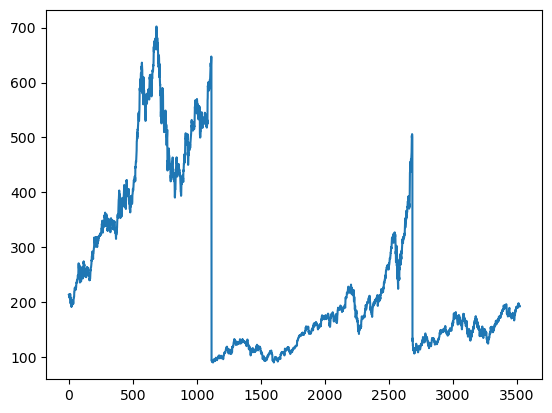

In [5]:
plt.plot(df.close)

In [6]:
df

,index,open,high,low,close,volume
0,2010-01-04,213.43,214.50,212.380,214.01,17633200
1,2010-01-05,214.60,215.59,213.250,214.38,21496600
2,2010-01-06,214.38,215.23,210.750,210.97,19720000
3,2010-01-07,211.75,212.00,209.050,210.58,17040400
4,2010-01-08,210.30,212.00,209.060,211.98,15986100
...,...,...,...,...,...,...
3517,2023-12-22,195.18,195.41,192.970,193.60,37149570
3518,2023-12-26,193.61,193.89,192.830,193.05,28919310
3519,2023-12-27,192.49,193.50,191.090,193.15,47899806
3520,2023-12-28,194.14,194.66,193.170,193.58,34049898


In [7]:
ma100 = df.close.rolling(100).mean()
ma100

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
3517    181.7683
3518    181.7871
3519    181.8987
3520    182.0460
3521    182.1733
Name: close, Length: 3522, dtype: float64

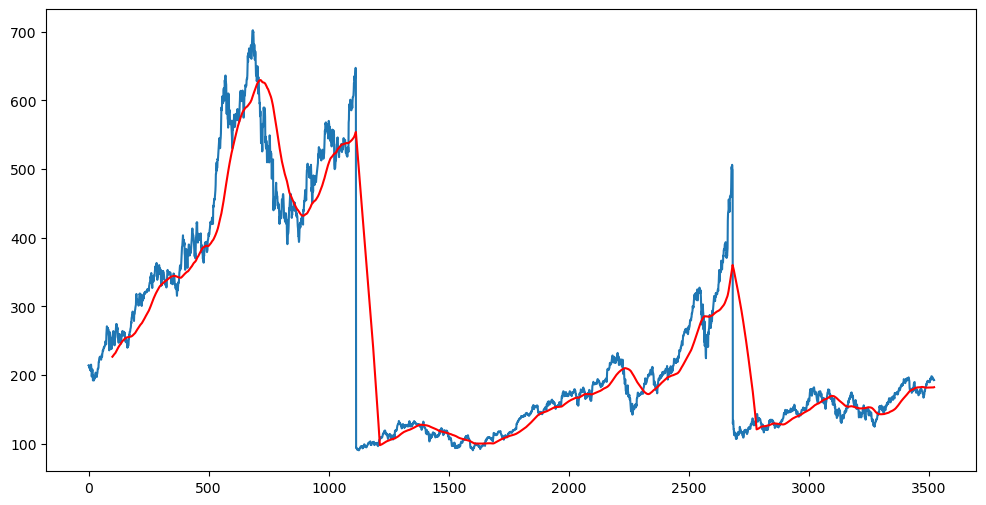

In [8]:
plt.figure(figsize = (12,6))
plt.plot(df.close)
plt.plot(ma100, 'r')

In [9]:
ma200 = df.close.rolling(200).mean()
ma200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
3517    178.64905
3518    178.87180
3519    179.08520
3520    179.29015
3521    179.48785
Name: close, Length: 3522, dtype: float64

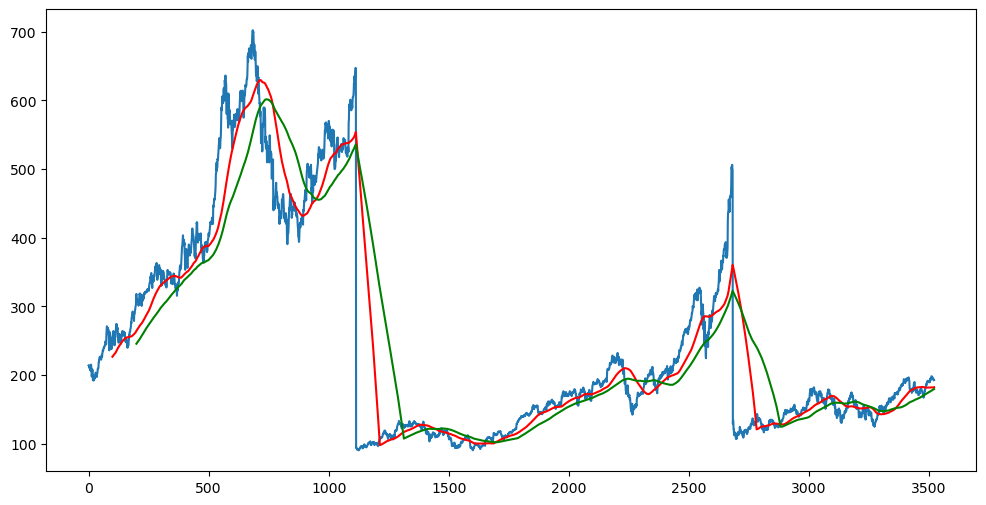

In [10]:
plt.figure(figsize = (12,6))
plt.plot(df.close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')

In [11]:
df.shape

(3522, 6)

In [12]:
# Splitting data into training and testing

data_training = pd.DataFrame(df['close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['close'][int(len(df)*0.70): int(len(df))])

print(data_training.shape)
print(data_testing.shape)

(2465, 1)
(1057, 1)


In [13]:
data_training.head()

,close
0,214.01
1,214.38
2,210.97
3,210.58
4,211.98


In [14]:
data_testing.head()

,close
2465,236.41
2466,240.51
2467,239.96
2468,243.18
2469,243.58


In [15]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [16]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.20223268],
       [0.20283744],
       [0.1972639 ],
       ...,
       [0.23706319],
       [0.23551044],
       [0.23699781]])

In [17]:
data_training_array.shape

(2465, 1)

In [18]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i,0])

x_train, y_train = np.array(x_train), np.array(y_train)

In [19]:
# ML Model
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [20]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True,
              input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

E:\Anaconda\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [21]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 100, 50)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 100, 60)             │          26,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 100, 60)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 100, 80)             │          45,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 100, 80)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 120)                 │          96,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 120)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             121 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

In [22]:
model.compile(optimizer='adam', loss = 'mean_squared_error')
model.fit(x_train, y_train, epochs = 50)

Epoch 1/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 38s 198ms/step - loss: 0.0664
Epoch 2/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 16s 212ms/step - loss: 0.0096
Epoch 3/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 19s 255ms/step - loss: 0.0078
Epoch 4/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 16s 221ms/step - loss: 0.0074
Epoch 5/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 20s 270ms/step - loss: 0.0084
Epoch 6/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 21s 280ms/step - loss: 0.0060
Epoch 7/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 20s 274ms/step - loss: 0.0046
Epoch 8/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 21s 286ms/step - loss: 0.0048
Epoch 9/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 18s 239ms/step - loss: 0.0044
Epoch 10/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 17s 231ms/step - loss: 0.0039
Epoch 11/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 16s 222ms/step - loss: 0.0050
Epoch 12/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 18s 245ms/step - loss: 0.0035
Epoch 13/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 18s 245ms/step - loss: 0.0048
Epoch 14/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 21s 282ms/step - loss: 0.0034
Epoch 15/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 24s 

In [23]:
model.save('keras_model.keras')

In [24]:
data_testing.head()

,close
2465,236.41
2466,240.51
2467,239.96
2468,243.18
2469,243.58


In [25]:
past_100_days = data_training.tail(100)

In [27]:
final_df = pd.concat([past_100_days, data_testing], ignore_index=True)

In [28]:
final_df.head()

,close
0,177.38
1,178.30
2,175.07
3,173.30
4,179.64


In [30]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.17668128],
       [0.1789856 ],
       [0.17089543],
       ...,
       [0.21618034],
       [0.21725736],
       [0.21462743]])

In [31]:
input_data.shape

(1157, 1)

In [34]:
x_test = []
y_test = []

for i in range (100, input_data.shape[0]):
    x_test.append(input_data[i-100: i])
    y_test.append(input_data[i, 0])

In [36]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(1057, 100, 1)
(1057,)


In [38]:
# making predictions

y_predicted = model.predict(x_test)

34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step


In [39]:
y_predicted.shape

(1057, 1)

In [40]:
y_test

array([0.3245335 , 0.33480276, 0.33342517, ..., 0.21618034, 0.21725736,
       0.21462743])

In [41]:
y_predicted

array([[0.32538548],
       [0.32993025],
       [0.334171  ],
       ...,
       [0.25833225],
       [0.258662  ],
       [0.2588017 ]], dtype=float32)

In [42]:
scaler.scale_

array([0.0025047])

In [43]:
scale_factor = 1/0.0025047
y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor

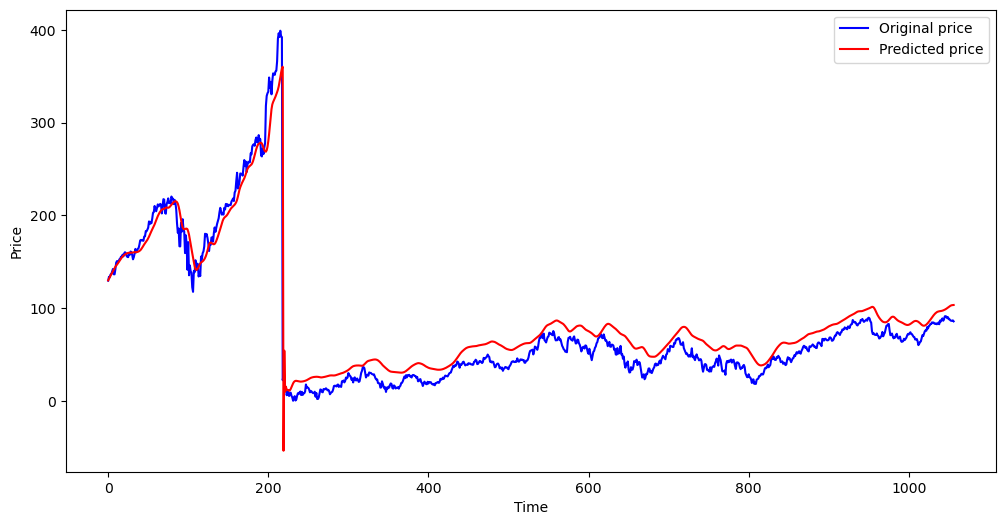

In [44]:
plt.figure(figsize=(12,6))
plt.plot(y_test, 'b', label = 'Original price')
plt.plot(y_predicted, 'r', label = 'Predicted price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()